In this task, I just use the watermelon dataset which is shown below.

# Dataset

In [32]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import math

In [5]:
def createDataSet():
    """
    创建测试的数据集，里面的数值中具有连续值
    :return:
    """
    dataSet = [
        # 1
        ['青绿', '蜷缩', '浊响', '清晰', '凹陷', '硬滑', 0.697, 0.460, '好瓜'],
        # 2
        ['乌黑', '蜷缩', '沉闷', '清晰', '凹陷', '硬滑', 0.774, 0.376, '好瓜'],
        # 3
        ['乌黑', '蜷缩', '浊响', '清晰', '凹陷', '硬滑', 0.634, 0.264, '好瓜'],
        # 4
        ['青绿', '蜷缩', '沉闷', '清晰', '凹陷', '硬滑', 0.608, 0.318, '好瓜'],
        # 5
        ['浅白', '蜷缩', '浊响', '清晰', '凹陷', '硬滑', 0.556, 0.215, '好瓜'],
        # 6
        ['青绿', '稍蜷', '浊响', '清晰', '稍凹', '软粘', 0.403, 0.237, '好瓜'],
        # 7
        ['乌黑', '稍蜷', '浊响', '稍糊', '稍凹', '软粘', 0.481, 0.149, '好瓜'],
        # 8
        ['乌黑', '稍蜷', '浊响', '清晰', '稍凹', '硬滑', 0.437, 0.211, '好瓜'],

        # ----------------------------------------------------
        # 9
        ['乌黑', '稍蜷', '沉闷', '稍糊', '稍凹', '硬滑', 0.666, 0.091, '坏瓜'],
        # 10
        ['青绿', '硬挺', '清脆', '清晰', '平坦', '软粘', 0.243, 0.267, '坏瓜'],
        # 11
        ['浅白', '硬挺', '清脆', '模糊', '平坦', '硬滑', 0.245, 0.057, '坏瓜'],
        # 12
        ['浅白', '蜷缩', '浊响', '模糊', '平坦', '软粘', 0.343, 0.099, '坏瓜'],
        # 13
        ['青绿', '稍蜷', '浊响', '稍糊', '凹陷', '硬滑', 0.639, 0.161, '坏瓜'],
        # 14
        ['浅白', '稍蜷', '沉闷', '稍糊', '凹陷', '硬滑', 0.657, 0.198, '坏瓜'],
        # 15
        ['乌黑', '稍蜷', '浊响', '清晰', '稍凹', '软粘', 0.360, 0.370, '坏瓜'],
        # 16
        ['浅白', '蜷缩', '浊响', '模糊', '平坦', '硬滑', 0.593, 0.042, '坏瓜'],
        # 17
        ['青绿', '蜷缩', '沉闷', '稍糊', '稍凹', '硬滑', 0.719, 0.103, '坏瓜']
    ]
    return dataSet

In [22]:
dataSet = createDataSet()
dataSet = np.array(dataSet)[:, 6:]
dataSet[dataSet == '好瓜'] = 1
dataSet[dataSet == '坏瓜'] = 0
dataSet = dataSet.astype('float64')

In [23]:
dataSet

array([[0.697, 0.46 , 1.   ],
       [0.774, 0.376, 1.   ],
       [0.634, 0.264, 1.   ],
       [0.608, 0.318, 1.   ],
       [0.556, 0.215, 1.   ],
       [0.403, 0.237, 1.   ],
       [0.481, 0.149, 1.   ],
       [0.437, 0.211, 1.   ],
       [0.666, 0.091, 0.   ],
       [0.243, 0.267, 0.   ],
       [0.245, 0.057, 0.   ],
       [0.343, 0.099, 0.   ],
       [0.639, 0.161, 0.   ],
       [0.657, 0.198, 0.   ],
       [0.36 , 0.37 , 0.   ],
       [0.593, 0.042, 0.   ],
       [0.719, 0.103, 0.   ]])

# Visulization

In [28]:
data_in_frame = pd.DataFrame(data=dataSet, columns=["density", "sugar_ratio","label"])

In [29]:
data_in_frame

,density,sugar_ratio,label
0,0.697,0.460,1.0
1,0.774,0.376,1.0
2,0.634,0.264,1.0
3,0.608,0.318,1.0
4,0.556,0.215,1.0
5,0.403,0.237,1.0
6,0.481,0.149,1.0
7,0.437,0.211,1.0
8,0.666,0.091,0.0
9,0.243,0.267,0.0


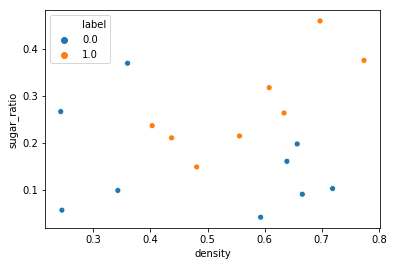

In [31]:
sns.scatterplot(data=data_in_frame, x='density', y="sugar_ratio", hue="label")

# Prediction Format

\begin{split}p \geq 0.5, class=1 \\
p < 0.5, class=0\end{split}



\begin{split}P(class=1) = \frac{1} {1 + e^{-z}}\end{split}

In [34]:
def sigmoid(x, derivative=False):
    sigm = 1. / (1. + np.exp(-x))
    if derivative:
        return sigm * (1. - sigm)
    return sigm

In [33]:
def predict(features, weights):
    """
    features: sample size * feature size
    weights: feature size * 1
    """
    weights = weights.reshape(len(weights),1)
    z = np.dot(features, weights)
    return sigmoid(z)

How could we do here? From Watermelon_book, we know that we can use MLE to estimate the parameters.

Meanwhile we can also repeat what we did in last experiment where we just included a cost function and optimized the patameters by decrease the cost function.

# Cost function

We can still use MSE as a cost function. But here what we use is called cross-entroy function actually. The reason why we abandon the previous one is another topic. Basicly, it's because of non-linear tranformation.

# \begin{split}-{(y\log(p) + (1 - y)\log(1 - p))}\end{split}

In [39]:
def cost_function(features, weights, labels):
    weights = weights.reshape(len(weights),1)
    labels = labels.reshape(len(labels),1)
    y = predict(features, weights)
    class1_cost = -labels*np.log(y)
    class2_cost = -labels*np.log(y)
    cost = (class1_cost + class2_cost).sum()/len(labels)
    return cost

# Gradient descent 

\begin{align}
s'(z) & = s(z)(1 - s(z))
\end{align}

\begin{split}C' = x(s(z) - y)\end{split}

In [66]:
def update_weights(features, weights, labels, learning_rate):
    weights = weights.reshape(len(weights),1)
    labels = labels.reshape(len(labels),1)
    p = predict(features, weights)
    gradient = np.dot(features.T, p - labels) / len(labels)
    weights = weights - gradient*learning_rate
    return weights

# Training

In [100]:
def training(features, weights, labels, learning_rate, iters):
    cost_history = []
    for i in range(iters):
        weights = update_weights(features, weights, labels, learning_rate)
        cost = cost_function(features, weights, labels)
        cost_history.append(cost)
        if i%1000 == 0:
            print("iters is %d \t \t cost is %f"%(i, cost))
    return weights, cost_history

In [107]:
weights_initial = np.array([0, 0])
weights, cost_history = training(dataSet[:, :2], weights_initial, dataSet[:, -1], 0.1, 20000)

iters is 0 	 	 cost is 0.651950
iters is 1000 	 	 cost is 0.572514
iters is 2000 	 	 cost is 0.546478
iters is 3000 	 	 cost is 0.528388
iters is 4000 	 	 cost is 0.515437
iters is 5000 	 	 cost is 0.505936
iters is 6000 	 	 cost is 0.498829
iters is 7000 	 	 cost is 0.493431
iters is 8000 	 	 cost is 0.489282
iters is 9000 	 	 cost is 0.486062
iters is 10000 	 	 cost is 0.483545
iters is 11000 	 	 cost is 0.481564
iters is 12000 	 	 cost is 0.479999
iters is 13000 	 	 cost is 0.478757
iters is 14000 	 	 cost is 0.477769
iters is 15000 	 	 cost is 0.476981
iters is 16000 	 	 cost is 0.476351
iters is 17000 	 	 cost is 0.475847
iters is 18000 	 	 cost is 0.475443
iters is 19000 	 	 cost is 0.475119


# Model evaluation

## Visulization

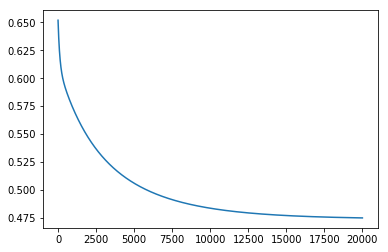

In [108]:
iters = np.arange(20000)
plt.plot(iters, cost_history)

From the fig abobe, we can think the cost function may still decrease when we update the weights furthur.

## Mapping probabilities to classes

In [135]:
def classify(predictions):
    predictions[predictions >= 0.5 ] = 1
    predictions[predictions < 0.5 ] = 0
    return predictions
def accuracy(predictions, labels):
    predictions = predictions.astype('int').reshape(len(predictions,))
    labels = labels.astype('int')
    diff = np.abs(predictions - labels)
    same = len(labels) - diff.sum()
    return same/len(labels)

In [128]:
predicted_label = classify(predict(dataSet[:, :2], weights))

In [136]:
accuracy(predicted_label, dataSet[:, -1])

0.8235294117647058